In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,r2_score
#from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
da=pd.read_csv("Advertising.csv")
da

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
da.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [4]:
print(da.shape)
print(da.size)
print(da.dtypes)

(200, 5)
1000
Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object


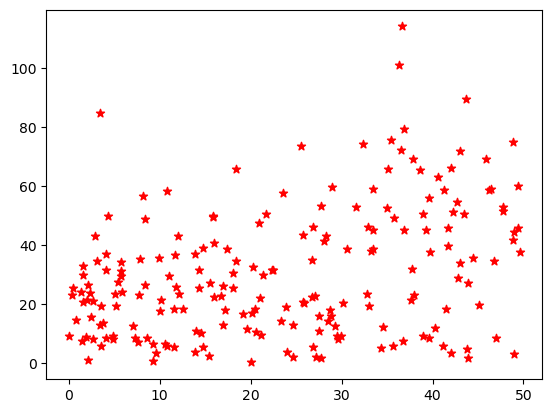

In [5]:
plt.scatter(x="Radio",y="Newspaper",marker="*",c="red",data=da)
plt.show()

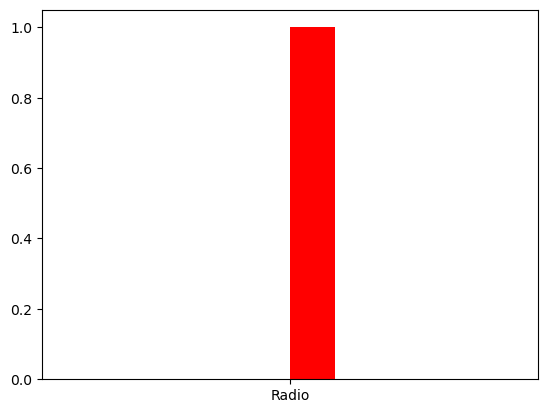

In [6]:
plt.hist(x="Radio",color="red")
plt.show()

# EDA

C:\Users\Dell\AppData\Local\Temp\ipykernel_2808\805505421.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=da["TV"],hist=False)


<Axes: ylabel='Density'>

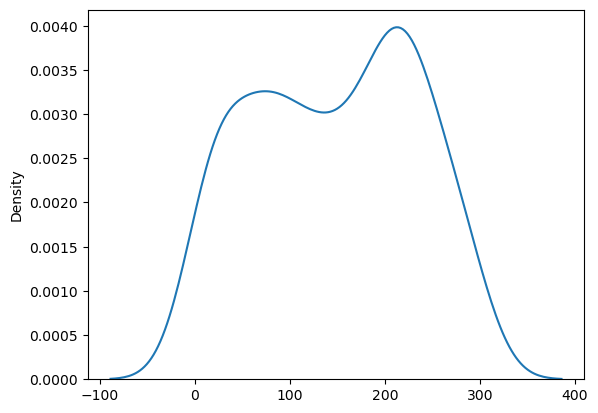

In [7]:
#UNIVARINATabs
sns.distplot(x=da["TV"],hist=False)

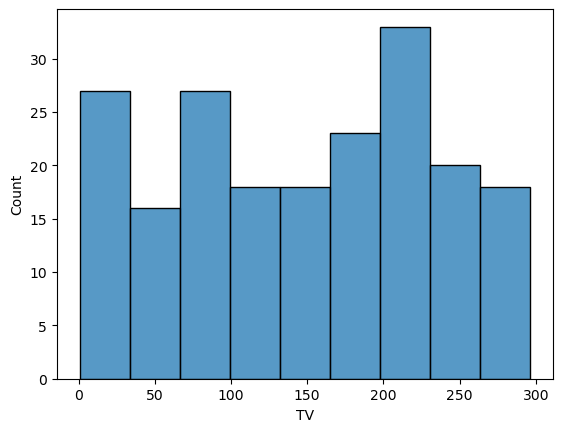

In [8]:
sns.histplot(x="TV",data=da)
plt.show()

<Axes: xlabel='TV', ylabel='count'>

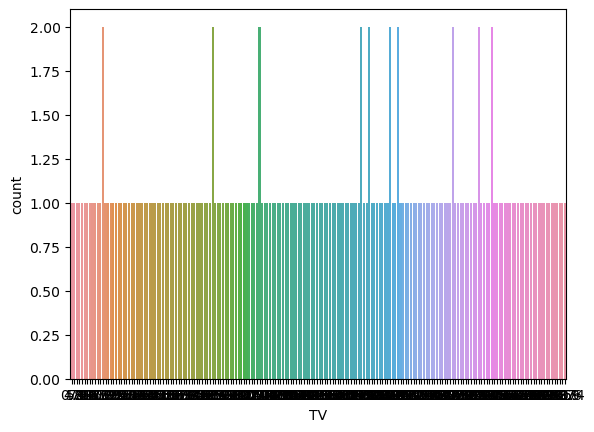

In [9]:
sns.countplot(x="TV",data=da)

<Axes: xlabel='TV'>

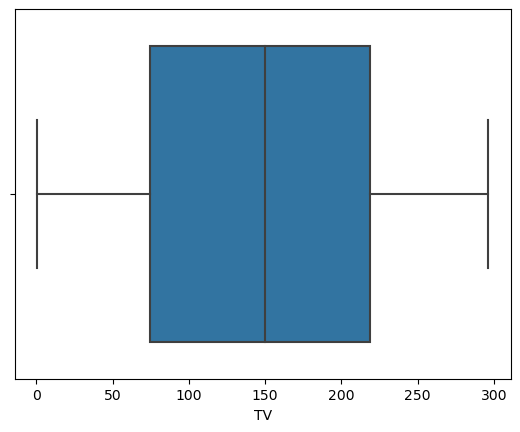

In [10]:
sns.boxplot(x="TV",data=da)

# bivarinate

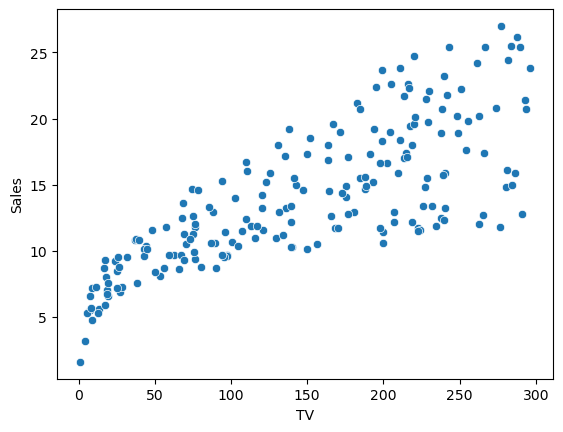

In [11]:
sns.scatterplot(x="TV",y="Sales",data=da)
plt.show()

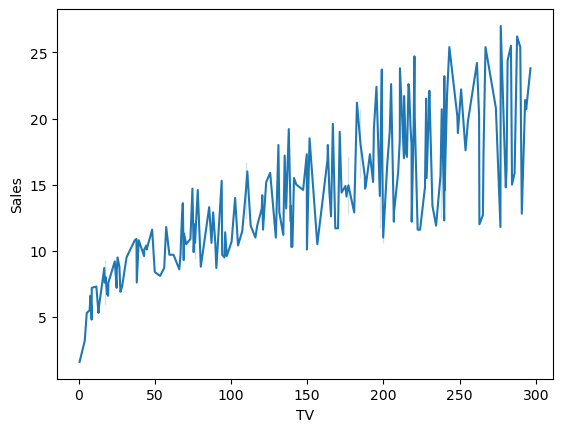

In [12]:
sns.lineplot(x="TV",y="Sales",data=da)
plt.show()

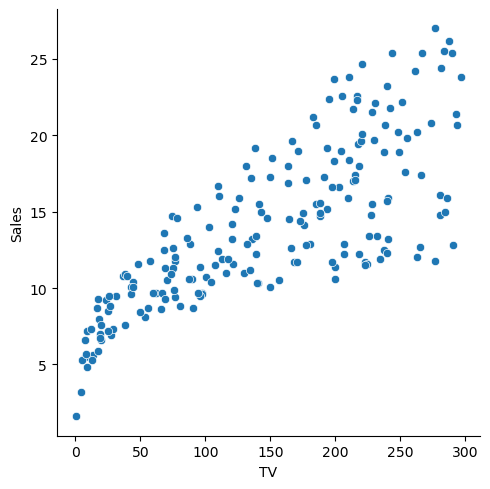

In [13]:
sns.relplot(x="TV",y="Sales",data=da)
plt.show()

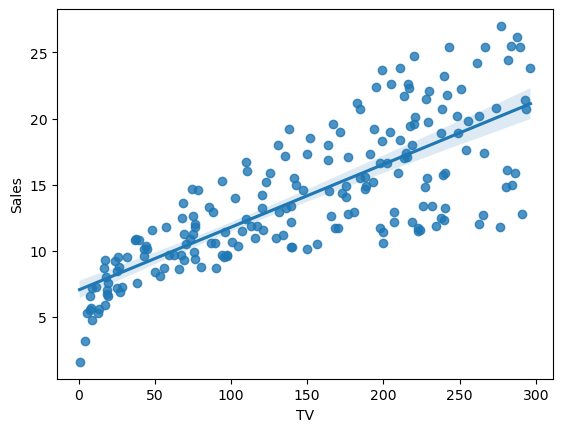

In [14]:
sns.regplot(x="TV",y="Sales",data=da)
plt.show()

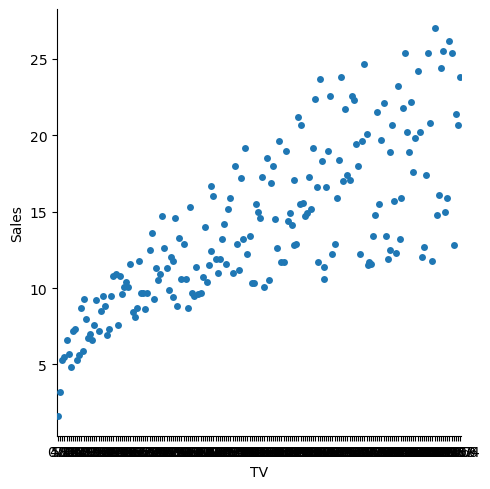

In [15]:
sns.catplot(x="TV",y="Sales",data=da)

C:\Users\Dell\ANACONDA\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


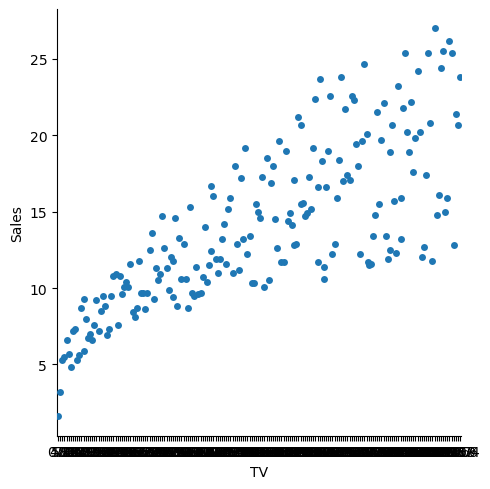

In [16]:
sns.catplot(x="TV",y="Sales",data=da,kind="swarm")

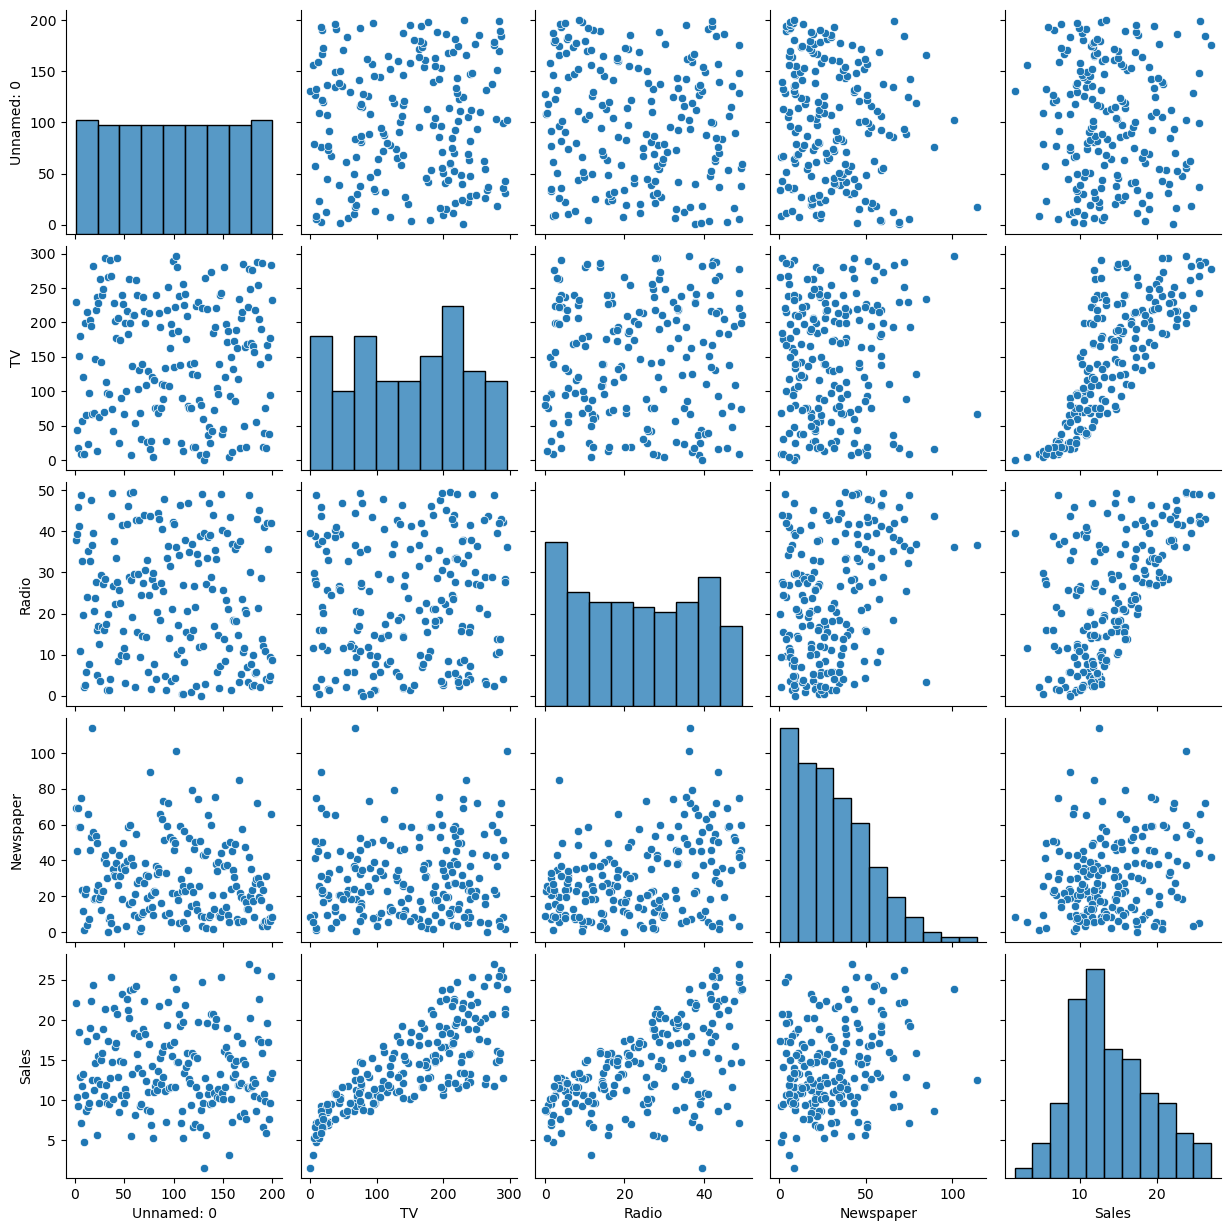

In [17]:
sns.pairplot(da)

In [18]:
da.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [19]:
da.max()

Unnamed: 0    200.0
TV            296.4
Radio          49.6
Newspaper     114.0
Sales          27.0
dtype: float64

In [20]:
da.min()

Unnamed: 0    1.0
TV            0.7
Radio         0.0
Newspaper     0.3
Sales         1.6
dtype: float64

In [21]:
da.mean()

Unnamed: 0    100.5000
TV            147.0425
Radio          23.2640
Newspaper      30.5540
Sales          14.0225
dtype: float64

In [22]:
da.duplicated().sum()

0

# feature engineering..

In [23]:
da.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [24]:
da.pop("Unnamed: 0")

0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Name: Unnamed: 0, Length: 200, dtype: int64

In [25]:
v=da.corr()
v

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

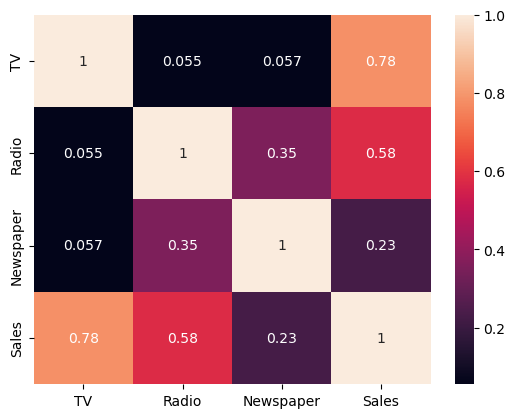

In [26]:
sns.heatmap(data=v,annot=True)

In [27]:
x=da[["TV","Radio","Newspaper"]]
y=da["Sales"]
#x=da.iloc[:,0:3]
#y=da.iloc[:,3]

In [28]:
model=LinearRegression()
model=model.fit(x,y)
slope=model.coef_
intercept=model.intercept_
predict=model.predict(x)
accuracy=model.score(x,y)
MAE=mean_absolute_error(y,predict)
MSE=mean_squared_error(y,predict)
RMSE=mean_squared_error(y,predict,squared=False)
#acc_score=accuracy_score(x,y)
print("slope :",slope)
print("intercept :",intercept)
print("accuracy :",accuracy)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2 :",r2_score(y,predict))

slope : [ 0.04576465  0.18853002 -0.00103749]
intercept : 2.9388893694594067
accuracy : 0.8972106381789522
MAE : 1.2520112296870682
MSE : 2.784126314510936
RMSE : 1.6685701407225697
R2 : 0.8972106381789522


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [30]:
rmodel=LinearRegression()
rmodel=rmodel.fit(x_train,y_train)
rslope=rmodel.coef_
rintercept=rmodel.intercept_
rpredict=model.predict(x_test)
raccuracy=model.score(x_train,y_train)
rMAE=mean_absolute_error(y_test,rpredict)
rMSE=mean_squared_error(y_test,rpredict)
rRMSE=mean_squared_error(y_test,rpredict,squared=False)
print("slope :",rslope)
print("intercept :",rintercept)
print("accuracy :",raccuracy)
print("MAE :",rMAE)
print("MSE :",rMSE)
print("RMSE :",rRMSE) # classification data
print("R2 :",r2_score(y_test,rpredict))

slope : [0.04695205 0.17658644 0.00185115]
intercept : 2.9372157346906125
accuracy : 0.8836345706348067
MAE : 1.0009163574043043
MSE : 1.7173862805677327
RMSE : 1.3104908548203351
R2 : 0.9309640558299838


## SVM method..

In [31]:
from sklearn.svm import SVR
sv=SVR(kernel="linear",C=5)
sv.fit(x_train,y_train)
sv.score(x_test,y_test)

0.9219014535548129

In [38]:
sv.score(x_train,y_train)

0.8749214509298896

In [33]:
import pickle

In [34]:
pickle.dump(sv,open("model.pkl","wb"))

In [35]:
read=pickle.load(open("model.pkl","rb"))
read

SVR(C=5, kernel='linear')

In [39]:
read.predict([[44.5,39.3,45.1]])

C:\Users\Dell\ANACONDA\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([1287.63698487])